# Lab Assignment 3: Vehicle Data Analysis and Visualization
**Name:** Eva Santana

**Date:** Oct 17 2025

## Data Cleaning

In [40]:
import pandas as pd
import csv

# Containers for good and bad data 
good_data = []
bad_data = []

file_path = ["vehicles_data.csv"]

# -----------------------------------
# Read CSV file safely
# -----------------------------------
with open(file_path[0], mode='r', encoding='ISO-8859-1') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader, None)

    for row in csv_reader:
        if not row or len(row) < 13:
            continue

        date_of_stop = row[0]
        time_of_stop = row[1]
        description = row[2]
        location = row[3]
        vehicle_type = row[4]
        year = row[5]
        make = row[6]
        model = row[7]
        color = row[8]
        violation_type = row[9]
        race = row[10]
        gender = row[11]
        price = row[12]

        bad = False

        # Check for missing or invalid values
        if (
            pd.isna(description) or pd.isna(location) or pd.isna(vehicle_type) or
            pd.isna(year) or pd.isna(make) or pd.isna(model) or pd.isna(color) or
            pd.isna(violation_type) or pd.isna(race) or pd.isna(gender) or pd.isna(price) or
            description == "" or location == "" or vehicle_type == "" or
            make == "" or model == "" or color == "" or
            violation_type == "" or race == "" or gender == ""
        ):
            bad = True
        else:
            # Convert numeric fields safely
            year_val = pd.to_numeric(year, errors='coerce')
            price_val = pd.to_numeric(price, errors='coerce')

            if pd.isna(year_val) or pd.isna(price_val):
                bad = True

        # Separate good vs bad data
        if bad:
            bad_data.append(row)
        else:
            good_data.append([
                date_of_stop, time_of_stop, description, location,
                vehicle_type, year_val, make, model, color,
                violation_type, race, gender, price_val
            ])

# Create the data frame 
columns = [
    "Date_of_Stop", "Time_of_Stop", "Description", "Location",
    "Vehicle_Type", "Year", "Make", "Model", "Color",
    "Violation_Type", "Race", "Gender", "Price"
]

# Good & Bad Data
df_good = pd.DataFrame(good_data, columns=columns)
df_bad = pd.DataFrame(bad_data, columns=header)


## Data Analysis

In [41]:
# Findings 
unique_years_sorted_desc = sorted(df_good['Year'].unique(), reverse=True)
unique_years_sorted_asc = sorted(df_good['Year'].unique())

# - 6th Newest Year of Vehicle (Max Year & Price)
sixth_newest_year = unique_years_sorted_desc[5]
sixth_newest_data = df_good[df_good['Year'] == sixth_newest_year]
sixth_newest_max_price = sixth_newest_data['Price'].max()

# - 4th Oldest Year of Vehicle (Max Year & Price)
fourth_oldest_year = unique_years_sorted_asc[3]  
fourth_oldest_data = df_good[df_good['Year'] == fourth_oldest_year]
fourth_oldest_max_price = fourth_oldest_data['Price'].max()


# Identify and count missing values per attribute
# -----------------------------------
missing_counts = (df_bad == "").sum() + df_bad.isnull().sum()

total_missing = missing_counts.sum()


# Combined Dataframe for summary results
# -----------------------------------
df_combined = pd.DataFrame({
    "Finding": [
        "6th Newest Year",
        "Max Price (6th Newest)",
        "4th Oldest Year",
        "Max Price (4th Oldest)",
        "Total Missing Values (All Attributes)"
    ],
    "Value": [
        sixth_newest_year,
        sixth_newest_max_price,  
        fourth_oldest_year,
        fourth_oldest_max_price,
        total_missing
    ]
})

df_combined.to_csv("combined_data.csv", index=False)



In [42]:
df_combined

,Finding,Value
0,6th Newest Year,9035.0
1,Max Price (6th Newest),2816339.0
2,4th Oldest Year,10.0
3,Max Price (4th Oldest),500.0
4,Total Missing Values (All Attributes),15502.0


# Data Visualzation

## Graph 1: Vehicle Make vs Average Price 
- Purpose: Identify which vehicle makes have the highest or lowest average prices.

- Conclusion: Helps understand how price varies by manufacturer.

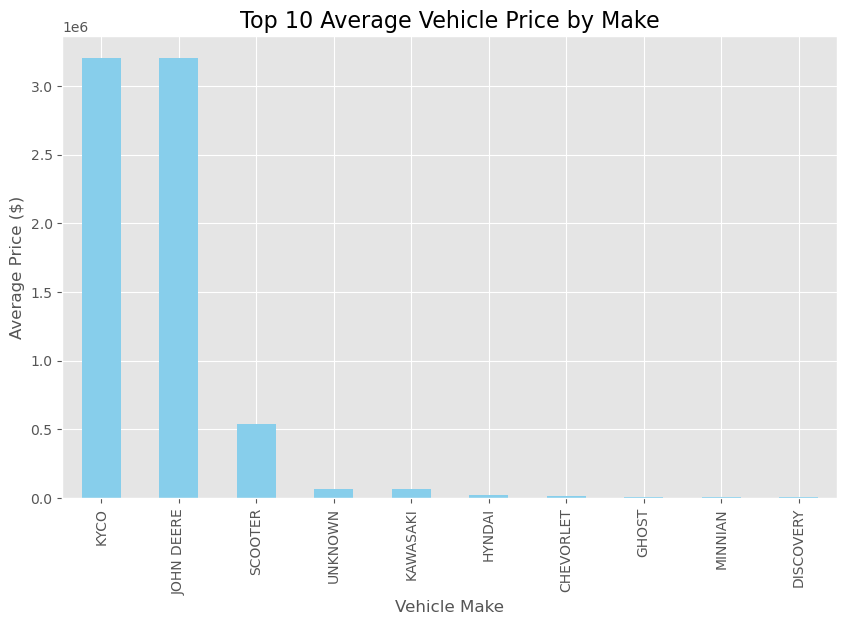

In [43]:
import matplotlib.pyplot as plt

# - Vehicle Make vs Average Price
avg_price_by_make = df_good.groupby("Make")["Price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_price_by_make.plot(kind='bar', color='skyblue')
plt.title("Top 10 Average Vehicle Price by Make", fontsize=16)
plt.xlabel("Vehicle Make", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.grid(True)
plt.savefig("vehicle_make_vs_average_price.png")
plt.show()


# Graph 2 : Vehicle Year vs Price 
- Purpose: See how average vehicle prices change over the years

- Conclusion: Shows trends in vehicle value by manufacturing year 

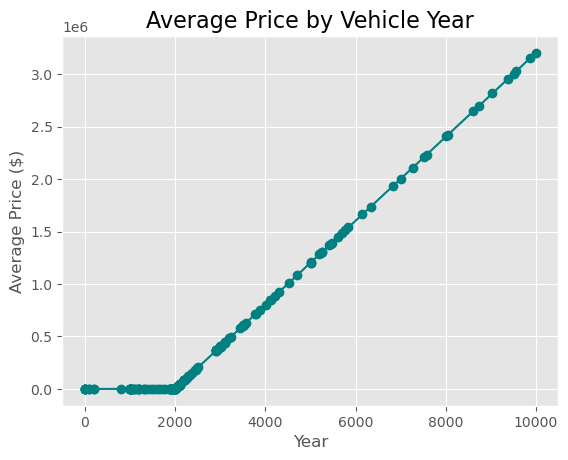

In [44]:
# - Vehicle Year vs Price (Line Chart)
avg_price_by_year = df_good.groupby("Year")["Price"].mean()

plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-', color='teal')
plt.title("Average Price by Vehicle Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.grid(True)
plt.savefig("vehicle_year_vs_price.png")
plt.show()

# Graph 3 : Violation Types vs Gender
- Purpose: Compare how violation types differ between genders

- Conclusion: Highlights any notable gender based trends in violation types 

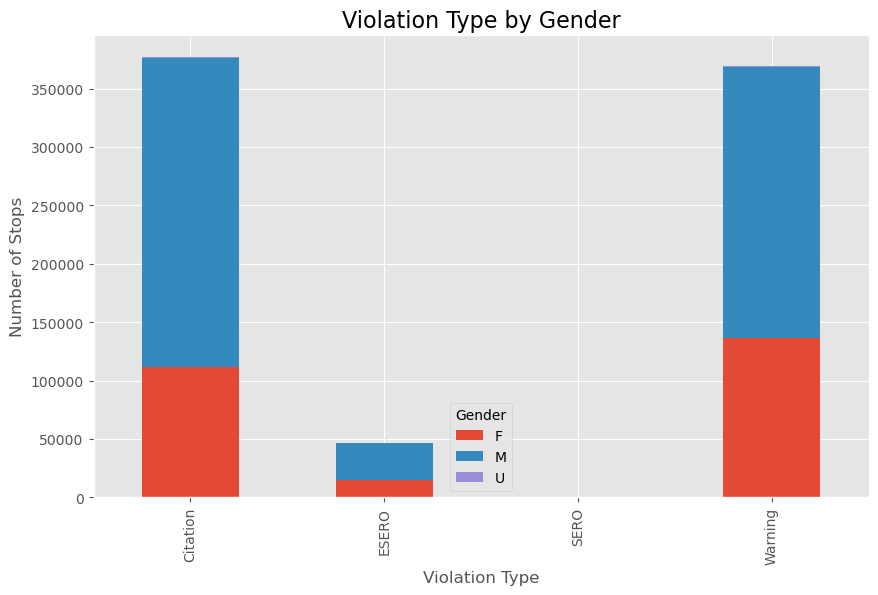

In [45]:
# - Violation Type vs Gender (Stacked Bar)
violation_gender = df_good.groupby(["Violation_Type", "Gender"]).size().unstack(fill_value=0)
violation_gender.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Violation Type by Gender", fontsize=16)
plt.xlabel("Violation Type", fontsize=12)
plt.ylabel("Number of Stops", fontsize=12)
plt.grid(True)
plt.savefig("violation_types_vs_gender.png")
plt.show()


# Graph 4 : Violation Types by Count 
- Purpose: To show which traffic violation types occur most frequently in the dataset.

- Conclusion: The graph reveals the most common offenses, highlighting key areas where traffic violations are most prevalent.

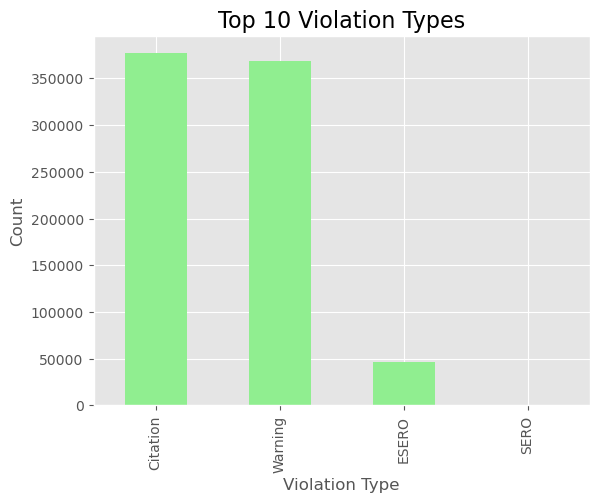

In [46]:
# Graph 4 – Violation Types by Count
violation_counts = df_good['Violation_Type'].value_counts().head(10)
violation_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Violation Types', fontsize=16)
plt.xlabel('Violation Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.savefig("top_10_violation_types.png")
plt.show()

# Graph 5 : Vehicle Color Distribution
- Purpose: See which vehicle colors are most common
- Insight: Shows popularity trends in car color preferences




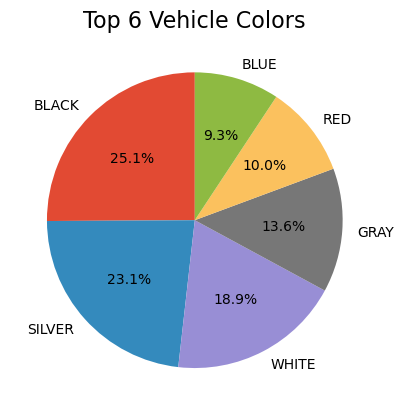

In [47]:
# - Vehicle Color Distribution (Pie Chart)
color_counts = df_good["Color"].value_counts().head(6)

plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 6 Vehicle Colors", fontsize=16)
plt.savefig("top6_Vehicle_color.png")
plt.show()